# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   

Good Luck!

### Amy Aumpansub

**Honor Pledge:**  
I pledge on my honor that I, **Amy Aumpansub**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
import sklearn
sklearn.__version__

'0.23.1'

In [3]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [4]:
# Your package imports here
from math import sqrt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [5]:
df = pd.read_csv("gas_emissions.csv")

In [6]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


**Answer:  There are 7384 rows and 11 variables.**

#### What is the average value of AP for those points who have CO levels above 3 mg/m3?

In [8]:
# Your code
df.loc[df['CO'] > 3, 'AP'].mean()

1015.6900173490633

**Answer:  The average value of AP having CO levels above 3 mg/m3 is: 1015.69**

#### Create a correlation map between the variables. Which variables have high correlation?

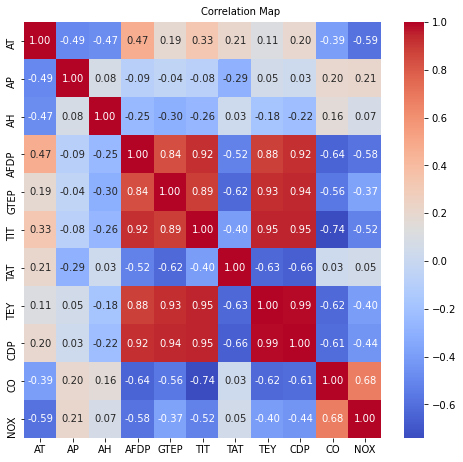

In [9]:
# Your code
corr = df.corr()
f, ax = plt.subplots(figsize=(8, 7))
t= f.suptitle('Correlation Map', fontsize=10)
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f')
f.subplots_adjust(top=0.95)

**Answer:** 
- The AFDP, GTEP, TIT, TEY, CDP variables have a high and positive correation among them indicated by the correlation value around 0.8-0.9. 
- For example, The AFDP variable has a high and positive correation with the GTEP, TIT, TEY, CDP variables indicated by the correlation value over 0.8. Simlarily, The GTEP variable also has a high and positive correation with the AFDP, TIT, TEY, CDP variables indicated by the correlation value approximately 0.8-0.9.
- The CO and NOX has a moderate positive correlation with the value of 0.68.
- The AFDP and CO has a moderate negative correlation with the value of -0.64.

#### Create a scatter plot of 'TEY' vs 'CDP'

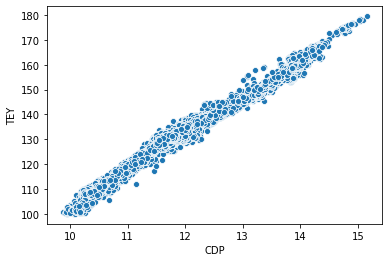

In [10]:
# Your code
sns.scatterplot(data = df, x='CDP', y='TEY')

#### Create histograms for CO and NOX.

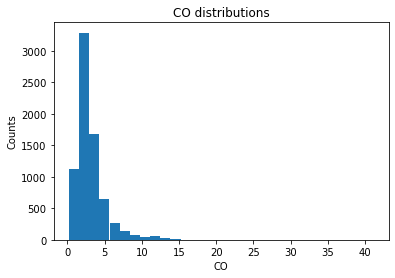

In [11]:
plt.hist(df['CO'], density=False, bins=30)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('CO')
plt.title('CO distributions')
plt.show()

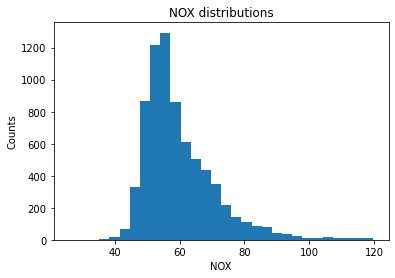

In [12]:
# Your code
plt.hist(df['NOX'], density=False, bins=30) 
plt.ylabel('Counts')
plt.xlabel('NOX')
plt.title('NOX distributions')
plt.show()

### Prepare data from machine learning

We will predict CO using all the other variables. The NOX will not be used. That is another emission gas that can be predicted as well.

In [13]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=555)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=555)

In [15]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [16]:
X_train.shape

(4651, 9)

In [17]:
X_val.shape

(1994, 9)

In [18]:
X_test.shape

(739, 9)

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ (on training data)?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $->$ square root $->$ RMSE)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn import metrics

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(X_train, y_train)

LinearRegression()

#### Compute R2

In [23]:
#Compute R2

pred_train = reg.predict(X_train)
pred_val = reg.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Train): ", r2_train )
print("R2 Score (Validation): ",r2_val)

R2 Score (Train):  0.646875213677454
R2 Score (Validation):  0.6290818432737131


#### Compute RMSE

In [24]:
#Compute RMSE

rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

RMSE (Train):  1.3132338270806216
RMSE (Validation):  1.3917448633939091


**Answer:**
- The R2 Score (Train) is 64.6% and R2 Score (Validation) is 62.9%, the model can fairly explain the data in which the R2 scores for train (higher) is slightly better than that of validation set.
- The RMSE (Train) is 1.31 and The RMSE  (Validation) is 1.39. The training RMSE with a lower value is slightly better than that of  validation set.

## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [27]:
# Your code
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Your code

#Compute R2
pred_train = reg.predict(X_train)
pred_val = reg.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Train): ", r2_train )
print("R2 Score (Validation): ",r2_val)

R2 Score (Train):  0.9629604436026409
R2 Score (Validation):  0.7510332972357139


In [29]:
#Compute RMSE

rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

RMSE (Train):  0.4253151454621139
RMSE (Validation):  1.1402267212656092


- The R2 Score (Train) is 96% and R2 Score (Validation) is 75%, the R2 scores for train is significantly higher than that of validation set.
- The difference in R2 is 22%, implying the overfitting problem.
- The RMSE (Train) is 0.42 and The RMSE  (Validation) is 1.14. The training RMSE is greatly lower than that of validation set.
- Both R2 score and RMSE for train and validation sets are not close and have difference greater than 0.10 so the model has an overfitting problem which may be caused from the the number of estimators. 
- So, we will find the best value of n_estimators and refit the model again.

**Find the best number of estimators**

In [30]:
E_list = [10, 30, 50, 70, 100, 150]
r2_train = []
r2_valid = []
rmse_valid = []
rmse_train = []
for e in E_list:
    reg =  RandomForestRegressor(n_estimators = e , random_state = 42)
    reg.fit(X_train, y_train)
    #Train
    pred_train = reg.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, pred_train))
    rmse_train.append(sqrt(metrics.mean_squared_error(y_train, pred_train)))
    #Valid
    pred_val = reg.predict(X_val)
    r2_valid.append(metrics.r2_score(y_val, pred_val))
    rmse_valid.append(sqrt(metrics.mean_squared_error(y_val, pred_val)))

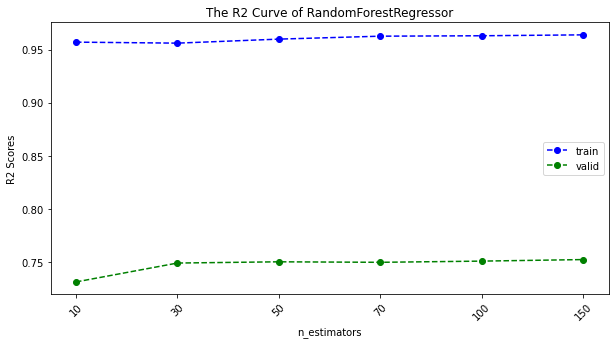

In [31]:
# Code here Plot R2 Curve
plt.figure(figsize=(10,5))
plt.title("The R2 Curve of RandomForestRegressor")
plt.plot(r2_train, 'bo--', label = 'train')
plt.plot(r2_valid,'go--', label = 'valid')
plt.xticks(np.arange(len(E_list)), E_list, rotation = 45)
plt.xlabel('n_estimators')
plt.ylabel('R2 Scores')
plt.legend()
plt.show()

- The best number of estimator is 50 where the gap between the R2 scores of both training and validation are smallest. 
- However, the r2 scores are still different more than 0.1, so we will apply the GridSearch CV with the number of estimator of 50 and other params to find the best model with R2 scores

**Apply Gridsearch CV with the best number of estimator of 50 and "R2" scoring**

In [32]:
ET_list = [50]
MD_list = [2, 5, 10, 15, 20, 30]
MS_list = [10, 30, 50, 100]
params = {'n_estimators': ET_list,
          'min_samples_split': MS_list,
         'max_depth': MD_list, 'random_state': [42]}

rf = RandomForestRegressor()
grid = GridSearchCV(estimator=rf, param_grid=params, verbose=1, cv=5,scoring="r2", n_jobs=-1)

In [33]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   25.5s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20, 30],
                         'min_samples_split': [10, 30, 50, 100],
                         'n_estimators': [50], 'random_state': [42]},
             scoring='r2', verbose=1)

In [34]:
grid.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_split=50, n_estimators=50,
                      random_state=42)

In [35]:
gs_reg = RandomForestRegressor(max_depth=30, min_samples_split=50, n_estimators=50,
                      random_state=42)
gs_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=50, n_estimators=50,
                      random_state=42)

In [36]:
# Your code
#Compute R2
pred_train = gs_reg.predict(X_train)
pred_val = gs_reg.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Train): ", r2_train )
print("R2 Score (Validation): ",r2_val)
#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Train):  0.8286027329102589
R2 Score (Validation):  0.7422609535629301
RMSE (Train):  0.9149132269777397
RMSE (Validation):  1.1601407705360824


**The new model is less overfitting than the initial model**

- The overfitting problem has less effect on this new model as R2 scores and RMSE of train and validation sets are closer than the initial model
- The R2 Score (Train) is 82.8% and R2 Score (Validation) is 74.2%.
- So, the new model is less overfitting, its R2 scores for train is only 8.6% higher than that of the validation, comparing to the initial model with 22% differences in R2.

## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Apply the process above using **linear kernel SVR**, **polynomial kernel SVR**, and **RBF kernel SVR**.

- Take RBF Kernel SVM and perform some hyperparameter tuning. See if you can increase the $R^2$ score.
    - During this process this make sure it doesn't overfit the data. 

In [37]:
from sklearn.svm import SVR

### 4.1 Linear SVR Regressor

In [38]:
reg = SVR(kernel='linear')

In [39]:
# Your code
reg.fit(X_train, y_train)

SVR(kernel='linear')

In [40]:
# Your code
#Compute R2
pred_train = reg.predict(X_train)
pred_val = reg.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Model): ", r2_train )
print("R2 Score (Validation): ",r2_val)
#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Model):  0.6142889670063518
R2 Score (Validation):  0.5923266225681006
RMSE (Train):  1.3724893738036412
RMSE (Validation):  1.4590721109546434


- The R2 Score (Train) is 61.4% and R2 Score (Validation) is 59.2%
- The training RMSE is 1.37 close to that of validation set 0f 1.45.
- R2 score for train and validation sets have difference only 0.02  so the model is not overfitting.

### 4.2 Polynomial Kernel SVR

In [41]:
from sklearn.svm import SVR

In [42]:
reg = SVR(kernel='poly')

In [43]:
# Your code
reg.fit(X_train, y_train)

SVR(kernel='poly')

In [44]:
# Your code
#Compute R2
pred_train = reg.predict(X_train)
pred_val = reg.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Model): ", r2_train )
print("R2 Score (Validation): ",r2_val)
#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Model):  0.7220653248687383
R2 Score (Validation):  0.6988221760466327
RMSE (Train):  1.165062774735266
RMSE (Validation):  1.2540997354186676


- The R2 Score (Train) is 72.2% and R2 Score (Validation) is 69.8%.
- The training RMSE is 1.16 close to that of validation set 0f 1.25.
- R2 score for train and validation sets have difference only 0.024  so the model is not overfitting.

### 4.3 RBF Kernel SVR

In [45]:
from sklearn.svm import SVR

In [46]:
reg = SVR(kernel='rbf')

In [47]:
# Your code
reg.fit(X_train, y_train)

SVR()

In [48]:
# Your code
#Compute R2
pred_train = reg.predict(X_train)
pred_val = reg.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Model): ", r2_train )
print("R2 Score (Validation): ",r2_val)
#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Model):  0.7537814347693682
R2 Score (Validation):  0.7239434577070454
RMSE (Train):  1.0965750440937958
RMSE (Validation):  1.2006587843948826


- The R2 Score (Train) is 75.3% and R2 Score (Validation) is 72.3%.
- The training RMSE is 1.097 close to that of validation set 0f 1.20.
- R2 score for train and validation sets have difference only 0.03  so the model is not overfitting.

All 3 SVM models above still have a moderate R2 score so we will improve the R2 by tuning some parameters in the next section.

### 4.4 Hyperparemeter Tuning for RBF kernel SVR

**1. Find the best C value (higher C can lead to overfitting)**

In [49]:
C_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
r2_train = []
r2_valid = []
for c in C_list:
    reg = SVR(kernel='rbf', C = c)
    reg.fit(X_train, y_train)
    #Train
    pred_train = reg.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, pred_train))
    #Valid
    pred_val = reg.predict(X_val)
    r2_valid.append(metrics.r2_score(y_val, pred_val))

In [50]:
print("R2 Train: ", r2_train)
print("R2 Validation: ", r2_valid)

R2 Train:  [-0.07429926421234812, -0.04854989869588966, 0.1520147338187584, 0.4890150811710998, 0.7067904949485582, 0.7537814347693682, 0.7686442661298736]
R2 Validation:  [-0.07631008155982277, -0.052213692162329295, 0.13622344290277366, 0.4544618652386422, 0.6675704325527981, 0.7239434577070454, 0.7364535878704698]


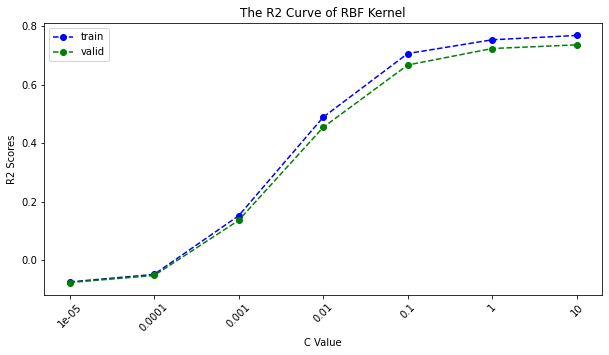

In [51]:
# Code here Plot R2 Curve
plt.figure(figsize=(10,5))
plt.title("The R2 Curve of RBF Kernel")
plt.plot(r2_train, 'bo--', label = 'train')
plt.plot(r2_valid,'go--', label = 'valid')
plt.xticks(np.arange(len(C_list)), C_list, rotation = 45)
plt.xlabel('C Value')
plt.ylabel('R2 Scores')
plt.legend()
plt.show()

- The best C value is 10, the model is still not overfitting as the gap is less only 3%.

**2. Find the best gamma value with previous best c**

In [52]:
G_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100, 1000]
r2_train = []
r2_valid = []
for g in G_list:
    reg = SVR(kernel='rbf', C = 10, gamma =g)
    reg.fit(X_train, y_train)
    #Train
    pred_train = reg.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, pred_train))
    #Valid
    pred_val = reg.predict(X_val)
    r2_valid.append(metrics.r2_score(y_val, pred_val))

In [53]:
print("R2 Train: ", r2_train)
print("R2 Validation: ", r2_valid)

R2 Train:  [0.43601790925528017, 0.5852980909130687, 0.6894667506495831, 0.7400007816027221, 0.7667524817588922, 0.8258891350468409, 0.9196797631130419, 0.9485181640742069, 0.9483628099271296]
R2 Validation:  [0.40890822039547636, 0.5607232486285189, 0.6699767487530619, 0.7429610685587464, 0.738793267251711, 0.6646935428721668, 0.475676238483579, 0.05133327585443059, 0.0007338830954578546]


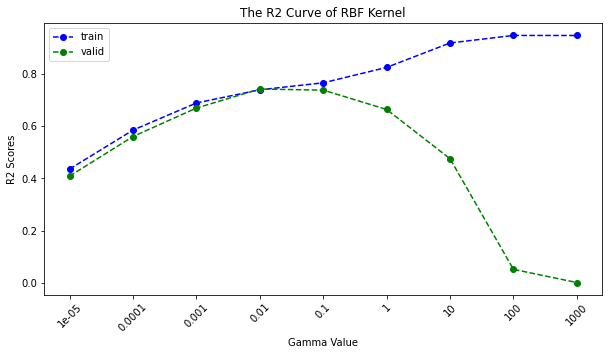

In [54]:
# Code here Plot R2 Curve
plt.figure(figsize=(10,5))
plt.title("The R2 Curve of RBF Kernel")
plt.plot(r2_train, 'bo--', label = 'train')
plt.plot(r2_valid,'go--', label = 'valid')
plt.xticks(np.arange(len(G_list)), G_list, rotation = 45)
plt.xlabel('Gamma Value')
plt.ylabel('R2 Scores')
plt.legend()
plt.show()

- The best Gamma value is 0.01, the model starts overfitting for the gamma value > 0.01.
- The best validation R2 at gamma of 0.01 is 74% which slightly improve from the initial model (72%)
- So, we will apply the Gridsearch CV to find the best params.

**3. GridSearchCV**

In [55]:
reg = SVR(kernel='rbf')
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value}

grid = GridSearchCV(estimator=reg, param_grid=params, verbose=1, cv=5,scoring="r2", n_jobs=-1)

In [56]:
grid.fit(X_train, y_train)
grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.8min finished


SVR(C=10, gamma=0.1)

In [57]:
gs_reg = SVR(kernel='rbf', C=10, gamma=0.1)
gs_reg.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [58]:
# Your code
#Compute R2
pred_train = gs_reg.predict(X_train)
pred_val = gs_reg.predict(X_val)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Train): ", r2_train )
print("R2 Score (Validation): ",r2_val)
#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Train):  0.7667524817588922
R2 Score (Validation):  0.738793267251711
RMSE (Train):  1.067299916893449
RMSE (Validation):  1.1679191086768477


**The new model is less overfitting and improves R2, RMSE scores**

- The new model has R2 score higher than the initial model for both train and validation sets
- The R2 Score (Train) is 76.6% and R2 Score (Validation) is 73.8%.
- So, the new model is less overfitting, its R2 scores for train is only 2.8% higher than that of the validation.
- The RMSE of the new model is also lower than the initial model.

## Q5 [10]

- Apply PCA and transform the data. 
- Take only the first 4 principal components.
- Use the PCA transformed data to perform regression.
- Apply Linear Regression, Random Forest Regression, and RBF Kernel Support Vector Regression.
For each model:
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their results obtained before. For example: Compare SVR with SVR from before. Use the best hyperparameters obtained from the experiments before. Any change in performance? Please explain. 
- Perform hyperparameter tuning of SVR using PCA transformed data. Any improvement?


In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=None)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

In [61]:
X_train_pca = X_train_pca[:, 0:4]
X_val_pca = X_val_pca[:, 0:4]

### 5.1 Linear Regression

In [62]:
# the same params from Q2 
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

LinearRegression()

In [63]:
# Your code
pred_train = reg.predict(X_train_pca)
pred_val = reg.predict(X_val_pca)

#Compute R2
r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Model): ", r2_train )
print("R2 Score (Validation): ",r2_val)

#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Model):  0.6128523714371698
R2 Score (Validation):  0.5925986135843695
RMSE (Train):  1.3750429430125601
RMSE (Validation):  1.4585852987864283


- The R2 Score (Train) is 61.2% and R2 Score (Validation) is 59.2%
- The training RMSE is 1.37  close to that of validation set 0f 1.45.
- The R2 of 4 PCAs model is 3% lower than the model in Q2 with all features.
- The RMSE of 4 PCAs model is also higher than the model in Q2.
- This implies the trade-off between the dimension reduction and information loss. 
- However, the R2 of previous model in Q2 is 64% (Train) and 62% (valid) which are slightly higher than R2 of 4 PCAs model, so we loss some info when reducing the dimesion of features as PCAs focus on maximimizing the variance.

### 5.2 Random Forest Regressor 

In [64]:
# the same params from Q3
reg = RandomForestRegressor(max_depth=30, min_samples_split=50, n_estimators=50,
                      random_state=42)
reg.fit(X_train_pca, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=50, n_estimators=50,
                      random_state=42)

In [65]:
# Your code
pred_train = reg.predict(X_train_pca)
pred_val = reg.predict(X_val_pca)

#Compute R2
r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Model): ", r2_train )
print("R2 Score (Validation): ",r2_val)

#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Model):  0.8095366963406843
R2 Score (Validation):  0.6800161750797766
RMSE (Train):  0.9644586585367511
RMSE (Validation):  1.2926608427474444


- The new R2 Score (Train) is 80.9% and R2 Score (Validation) is 68%
- The R2 of previous model in Q3 is 82% (Train) and 74% (valid) which are higher than R2 of PCA model.
- The training RMSE of the PCAs model is 0.96 and RMSE of validation set is 1.29.
- The Random Forest Regressor model with 4 PCAs performs worse than the model in Q3 fitted with all features.
- This implies that we miss some info when reducing the dimesion of features as PCAs focus on maximimizing the variance.
- The new PCAs model seems more overfitting as the gap of R2 for train and valid sets is 13%.

### 5.3 RBF Kernel with SVR

In [66]:
#the same params from Q4
reg = SVR(kernel='rbf', C=10, gamma=0.1)
reg.fit(X_train_pca, y_train)

SVR(C=10, gamma=0.1)

In [67]:
# Your code
pred_train = reg.predict(X_train_pca)
pred_val = reg.predict(X_val_pca)

#Compute R2
r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Train): ", r2_train )
print("R2 Score (Validation): ",r2_val)

#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Train):  0.7456823389845262
R2 Score (Validation):  0.7051962687571955
RMSE (Train):  1.1144644514946718
RMSE (Validation):  1.24075795590869


- The R2 Score (Train) is 74.5% and R2 Score (Validation) is 70.5%
- The training RMSE is 1.11 close to that of validation set 0f 1.24.
- The RBF Regressor model with 4 PCAs performs slighly worse than the model in Q4 with all features.
- For example, the R2 of previous model in Q4 is 76% (Train) and 73% (valid) which are higher than R2 of PCA model.
- The RMSE of the new PCAs model is also higher than the previous model.
- The new PCAs model is not overfitting as the gap of R2 for train and valid sets is 4%.
- Similarily to other PCA models, we loss some info when reducing dimension as PCAs focus on maximimizing the variance.

### 5.4 Comparison Summary

- Fitted the PCA model with the best parameters found in previous questions, all models with PCAs perform slighly worse than the innital model fitted with all features.
- The PCAs focus on maximimizing the variance which implies the trade-off between the dimension reduction and some information loss. 
- Moreover, PCAs can capture only linear structure, which may not perform well if our input has non-linear structure.
- Although we have some information loss, the models with 4 PCAs have R2 score of validation only about 3 % lower than the inital model. So, we still can preserve the main info when using the PCAs, and PCAs benefits in reducing the dimesion of features.
- The models with PCA is still not overfitting as the difference of R2 scores for train and valid sets < 10%.

### 5.5 Parameter tuning of RBF Kernel SVR using the PCA 

#### 1. Find the best C value

In [68]:
# Your code
C_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
r2_train = []
r2_valid = []
for c in C_list:
    reg = SVR(kernel='rbf', C = c)
    reg.fit(X_train_pca, y_train)
    #Train
    pred_train = reg.predict(X_train_pca)
    r2_train.append(metrics.r2_score(y_train, pred_train))
    #Valid
    pred_val = reg.predict(X_val_pca)
    r2_valid.append(metrics.r2_score(y_val, pred_val))

In [69]:
print("R2 Train: ", r2_train)
print("R2 Validation: ", r2_valid)

R2 Train:  [-0.07416333111988549, -0.04674081267393282, 0.16284636039777012, 0.49820024078152736, 0.6830707770342923, 0.7372447022133592, 0.7475467282450216]
R2 Validation:  [-0.07618964747773949, -0.05056515233641257, 0.14588867304417086, 0.4610728284531266, 0.637624770149366, 0.6941874852265475, 0.7053312008727297]


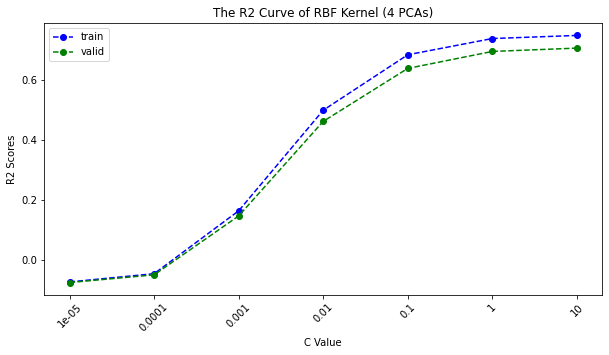

In [70]:
# Code here Plot R2 Curve
plt.figure(figsize=(10,5))
plt.title("The R2 Curve of RBF Kernel (4 PCAs)")
plt.plot(r2_train, 'bo--', label = 'train')
plt.plot(r2_valid,'go--', label = 'valid')
plt.xticks(np.arange(len(C_list)), C_list, rotation = 45)
plt.xlabel('C Value')
plt.ylabel('R2 Scores')
plt.legend()
plt.show()

- The best C value is 10, the model is still not overfitting as the gap is 4.2%.

#### 2. Find the best gamma value with previous best c

In [71]:
G_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
r2_train = []
r2_valid = []
for g in G_list:
    reg = SVR(kernel='rbf', C = 10, gamma =g)
    reg.fit(X_train_pca, y_train)
    #Train
    pred_train = reg.predict(X_train_pca)
    r2_train.append(metrics.r2_score(y_train, pred_train))
    #Valid
    pred_val = reg.predict(X_val_pca)
    r2_valid.append(metrics.r2_score(y_val, pred_val))

In [72]:
print("R2 Train: ", r2_train)
print("R2 Validation: ", r2_valid)

R2 Train:  [0.43443349844958246, 0.5645263552961397, 0.6665180906967635, 0.7241780117705088, 0.7456823389845262, 0.7883627649323393, 0.8759846362351826, 0.9443287699126373]
R2 Validation:  [0.40741173185163027, 0.5395581394893099, 0.6416891830902647, 0.7089278277837101, 0.7051962687571955, 0.6537298631724862, 0.5540697225283089, 0.12399902030683674]


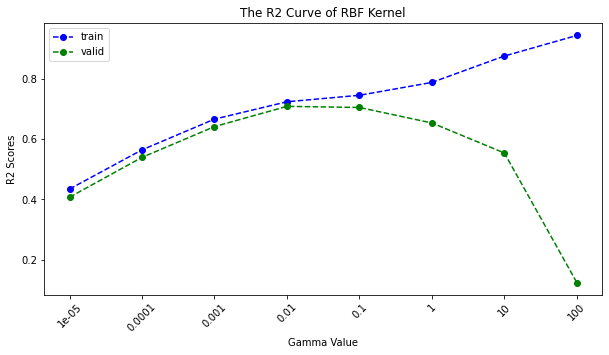

In [73]:
# Code here Plot R2 Curve
plt.figure(figsize=(10,5))
plt.title("The R2 Curve of RBF Kernel")
plt.plot(r2_train, 'bo--', label = 'train')
plt.plot(r2_valid,'go--', label = 'valid')
plt.xticks(np.arange(len(G_list)), G_list, rotation = 45)
plt.xlabel('Gamma Value')
plt.ylabel('R2 Scores')
plt.legend()
plt.show()

- The best Gamma value is 0.01, the model starts overfitting for the gamma value > 0.01.
- The best validation R2 at gamma of 0.01 is 70.8% which slightly improve from the initial model (70.5%)
- So, we will apply the Gridsearch CV to find the best params.

#### 3. GridSearchCV

In [74]:
reg = SVR(kernel='rbf')
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value}

grid = GridSearchCV(estimator=reg, param_grid=params, verbose=1, cv=5,scoring="r2", n_jobs=-1)

In [75]:
grid.fit(X_train_pca, y_train)
grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.7min finished


SVR(C=100, gamma=0.1)

In [76]:
gs_reg = SVR(kernel='rbf', C=100, gamma=0.1)
gs_reg.fit(X_train_pca, y_train)

SVR(C=100, gamma=0.1)

In [77]:
# Your code
#Compute R2
pred_train = gs_reg.predict(X_train_pca)
pred_val = gs_reg.predict(X_val_pca)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Train): ", r2_train )
print("R2 Score (Validation): ",r2_val)
#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Train):  0.7553520551772321
R2 Score (Validation):  0.6944717526144683
RMSE (Train):  1.0930719399187148
RMSE (Validation):  1.2631248086197129


- The R2 Score (Train) is 75.5% and R2 Score (Validation) is 69.4%
- The training RMSE is 1.09 close to that of validation set 0f 1.26.
- The RBF model with 4 PCAs from the gridsearch is slightly improved as R2 is higher and RMSE is lower.
- The new PCAs model is more overfitting as the gap of R2 for train and valid sets is 6%.

## Q6 [10]

- Apply Kernel PCA (KPCA) and transform the data. 
- Take the first 30 kernel principal components.(In KPCA you will (in many cases) have more dimensions than your original number of features!)
- Use the KPCA transformed data to perform regression.
- Now apply Linear Regression, Random Forest Regression, and RBF Kernel Support Vector Regression.
For each model:
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their results obtained before. For example: Compare SVR with SVR from before. Use the best hyperparameters obtained from the experiments before. 
    - Is there any change in performance when compared to models trained on original data? Please explain. 
    - Is there any change in performance when compared to models trained on PCA transformed data? Please explain. 
    
- Perform hyperparameter tuning of SVR using KPCA transformed data. Any improvement?

In [78]:
from sklearn.decomposition import KernelPCA

In [79]:
kpca = KernelPCA(n_components=100, kernel='rbf', n_jobs=-1, remove_zero_eig=True)
kpca.fit(X_train)
X_train_kpca = kpca.transform(X_train)
X_val_kpca = kpca.transform(X_val)

In [80]:
X_train_kpca = X_train_kpca[:, 0:30]
X_val_kpca = X_val_kpca[:, 0:30]

### 6.1 Linear Regression

In [81]:
# the same params from Q2, Q5
reg = LinearRegression()
reg.fit(X_train_kpca, y_train)

LinearRegression()

In [82]:
# Your code
pred_train = reg.predict(X_train_kpca)
pred_val = reg.predict(X_val_kpca)

#Compute R2
r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Model): ", r2_train )
print("R2 Score (Validation): ",r2_val)

#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Model):  0.7367356216476463
R2 Score (Validation):  0.7067752703974688
RMSE (Train):  1.1338980533990024
RMSE (Validation):  1.2374306756590325


- **The all-Features model in Q2** - The R2 (Train) is 64.6% and R2 (Valid) is 62.9%, and The RMSE (Train) is 1.31 the RMSE (validation) is 1.39.
- **The 4-PCAs model in Q5** - The R2 (Train) is 61.2% and R2 (Valid) is 59.2%, and The RMSE (Train) is 1.37 the RMSE (validation) is 1.45.
- **The 30-KPCAs model** - The R2 (Train) is 73.6% and R2 (Valid) is 70.6%, and The RMSE (Train) is 1.13 the RMSE (validation) is 1.23.

- The Linear model with 30 KPCAs performs better than the model in Q2 with all features and the model in Q5 with 4 PCAS as the new model has the higher R2 and lower RMSE than than the model with all features and with 4 PCAs.
- This is because that the KPCAs increases to the high dimensional feature space, thus it can capture the non-linear structure among features, which improves the performance of our model.

### 6.2 Random Forest Regressor

In [83]:
# the same params from Q3, Q5
reg = RandomForestRegressor(max_depth=30, min_samples_split=50, n_estimators=50,
                      random_state=42)
reg.fit(X_train_kpca, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=50, n_estimators=50,
                      random_state=42)

In [84]:
# Your code
pred_train = reg.predict(X_train_kpca)
pred_val = reg.predict(X_val_kpca)

#Compute R2
r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Model): ", r2_train )
print("R2 Score (Validation): ",r2_val)

#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Model):  0.8396468156145148
R2 Score (Validation):  0.7204392407365302
RMSE (Train):  0.8849459667532897
RMSE (Validation):  1.2082552373095563


- **The all-Features model in Q3** - The R2 (Train) is 82.8% and R2 (Valid) is 74.2%, and The RMSE (Train) is 0.94 the RMSE (validation) is 1.16.
- **The 4-PCAs model in Q5** - The R2 (Train) is 80.9% and R2 (Valid) is 68%, and The RMSE (Train) is 0.96 the RMSE (validation) is 1.29.
- **The 30-KPCAs model** - The R2 (Train) is 83.9% and R2 (Valid) is 72%, and The RMSE (Train) is 0.88 the RMSE (validation) is 1.20.

- The Random Forest Regressor model with 30 KPCAs performs better than the model in Q5 with 4 PCAS, but performs as well as the model in Q3 with all features.
- The R2 scores (Valid) of the 30 KPCAs model is 4% higher than the model in Q5 with 4 PCAs. 
- This implies that the KPCAs can capture the non-linear structure among features better than PCAs which is aimed to capture the linear structure. The KPCA transforms input to a high dimensinal feature space, thus improves the performance of our model.

### 6.3 RBF Kernel with SVR

In [85]:
#the same params from Q4
reg = SVR(kernel='rbf', C=10, gamma=0.1)
reg.fit(X_train_kpca, y_train)

SVR(C=10, gamma=0.1)

In [86]:
# Your code
pred_train = reg.predict(X_train_kpca)
pred_val = reg.predict(X_val_kpca)

#Compute R2
r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Model): ", r2_train )
print("R2 Score (Validation): ",r2_val)

#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Model):  0.7437404463861647
R2 Score (Validation):  0.7155274300093681
RMSE (Train):  1.1187112165862774
RMSE (Validation):  1.2188233865897349


- **The all-Features model in Q4** - The R2 (Train) is 76.6% and R2 (Valid) is 73.8%, and The RMSE (Train) is 1.06 the RMSE (validation) is 1.16.
- **The 4-PCAs model in Q5** - The R2 (Train) is 75.5% and R2 (Valid) is 69.4%, and The RMSE (Train) is 1.09 the RMSE (validation) is 1.26.
- **The 30-KPCAs model** - The R2 (Train) is 74.3% and R2 (Valid) is 71.5%, and The RMSE (Train) is 1.11 the RMSE (validation) is 1.21.

- The SVR model with 30 KPCAs performs better than the model in Q5 with 4 PCAS, but performs as well as the model in Q4 with all features.
- The R2 scores (Valid) of the 30 KPCAs model is 4% higher than the model in Q5 with 4 PCAs. 
- This implies that the KPCAs can capture the non-linear structure among features better than PCAs which is aimed to capture the linear structure. The KPCA transforms input to a high dimensinal feature space, thus improves the performance of our model.

### 6.4 Comparison Summary

- Fitted the KPCA model with the best parameters found in previous questions, all models with KPCAs perform better than the model fitted with 4 PCAs.
- The models with 30 KPCA is not overfitting as the differnce of R2 scores for train and valid sets < 10%.
- The models with 30 KPCAs have R2 score of validation more than 5% higher than the 4 PCAs model
- The KPCAs perfomrs better and can capture the non-linear structure among features by transforming input to a high dimemsional feature space, thus improves the performance of our model.
- The 4 PCAs performs the worst as it can capture only linear structure.


### 6.5 Parameter tuning of RBF Kernel SVM using KPCA 

#### 1. Find the best C value

In [87]:
# Your code
C_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
r2_train = []
r2_valid = []
for c in C_list:
    reg = SVR(kernel='rbf', C = c)
    reg.fit(X_train_kpca, y_train)
    #Train
    pred_train = reg.predict(X_train_kpca)
    r2_train.append(metrics.r2_score(y_train, pred_train))
    #Valid
    pred_val = reg.predict(X_val_kpca)
    r2_valid.append(metrics.r2_score(y_val, pred_val))

In [88]:
print("R2 Train: ", r2_train)
print("R2 Validation: ", r2_valid)

R2 Train:  [-0.07552981305079154, -0.06037169084132055, 0.06920638104006527, 0.4292463212043248, 0.6963203828769139, 0.7553497129923955, 0.7688390873848434]
R2 Validation:  [-0.07745670604022825, -0.06323438274975568, 0.05872918832678564, 0.40042878133081383, 0.6619307930190484, 0.7328949609079691, 0.7412627059173895]


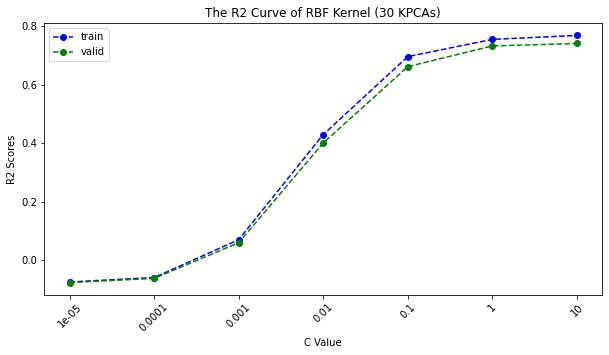

In [89]:
# Code here Plot R2 Curve
plt.figure(figsize=(10,5))
plt.title("The R2 Curve of RBF Kernel (30 KPCAs)")
plt.plot(r2_train, 'bo--', label = 'train')
plt.plot(r2_valid,'go--', label = 'valid')
plt.xticks(np.arange(len(C_list)), C_list, rotation = 45)
plt.xlabel('C Value')
plt.ylabel('R2 Scores')
plt.legend()
plt.show()

- The best C value is 10, the model is still not overfitting as the gap is 2.7%.

#### 2. Find the best gamma value with previous best c

In [90]:
G_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
r2_train = []
r2_valid = []
for g in G_list:
    reg = SVR(kernel='rbf', C = 10, gamma =g)
    reg.fit(X_train_kpca, y_train)
    #Train
    pred_train = reg.predict(X_train_kpca)
    r2_train.append(metrics.r2_score(y_train, pred_train))
    #Valid
    pred_val = reg.predict(X_val_kpca)
    r2_valid.append(metrics.r2_score(y_val, pred_val))

In [91]:
print("R2 Train: ", r2_train)
print("R2 Validation: ", r2_valid)

R2 Train:  [-0.021358953031922256, 0.2704277893063457, 0.5608425799880812, 0.7260935341822847, 0.7437404463861647, 0.7616032740162757, 0.8321842333985794, 0.9260164339148258]
R2 Validation:  [-0.026739247517745035, 0.2475184350273929, 0.5244751616311462, 0.694140858630589, 0.7155274300093681, 0.7409704797326917, 0.7042009421404436, 0.45158392216847565]


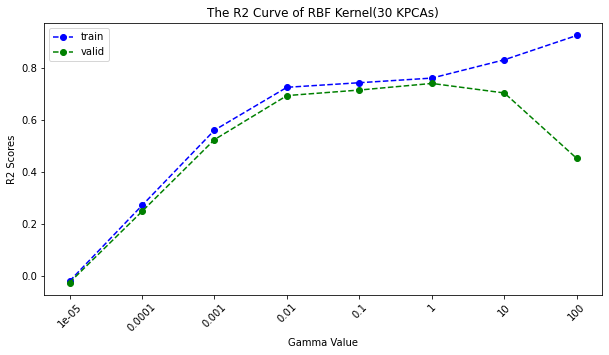

In [92]:
# Code here Plot R2 Curve
plt.figure(figsize=(10,5))
plt.title("The R2 Curve of RBF Kernel(30 KPCAs)")
plt.plot(r2_train, 'bo--', label = 'train')
plt.plot(r2_valid,'go--', label = 'valid')
plt.xticks(np.arange(len(G_list)), G_list, rotation = 45)
plt.xlabel('Gamma Value')
plt.ylabel('R2 Scores')
plt.legend()
plt.show()

The best Gamma value is 1, the model starts overfitting for the gamma value > 1.
The best validation R2 at gamma of 1 is 74.9% which improve from the initial model (72%)
So, we will apply the Gridsearch CV to find the best params.

#### 3. GridSearchCV

In [93]:
reg = SVR(kernel='rbf')
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value}

grid = GridSearchCV(estimator=reg, param_grid=params, verbose=1, cv=5,scoring="r2", n_jobs=-1)

In [94]:
grid.fit(X_train_kpca, y_train)
grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.3min finished


SVR(C=10, gamma=1)

In [95]:
gs_reg = SVR(kernel='rbf', C=10, gamma=1)
gs_reg.fit(X_train_kpca, y_train)

SVR(C=10, gamma=1)

In [96]:
# Your code
#Compute R2
pred_train = gs_reg.predict(X_train_kpca)
pred_val = gs_reg.predict(X_val_kpca)

r2_train = metrics.r2_score(y_train, pred_train)
r2_val = metrics.r2_score(y_val, pred_val)
print("R2 Score (Train): ", r2_train )
print("R2 Score (Validation): ",r2_val)
#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val, pred_val))

print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Train):  0.7616032740162757
R2 Score (Validation):  0.7409704797326917
RMSE (Train):  1.0790165431590053
RMSE (Validation):  1.1630414990137783


- The R2 Score (Train) is 76% and R2 Score (Validation) is 74%
- The training RMSE is 1.07 close to that of validation set 0f 1.16.
- The RBF Regressor model with 30 KPCAs from the gridsearch is improved as R2 is higher and RMSE is lower.
- The new 30 KPCAs model is less overfitting as the gap of R2 for train and valid sets is only 2%.
- Comparing to all models, this new model with 30 KPCAs model is the least overfitting and performs the best as it can capture the non-linear structure among features, thus improves the performance of our model.

## Q7 [10]

#### Let's do some classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [97]:
from sklearn.preprocessing import Binarizer

In [98]:
binarizer = Binarizer(threshold=3)

In [99]:
binarizer.fit([y_train])
y_train_cat = binarizer.transform([y_train]).ravel()
y_val_cat = binarizer.transform([y_val]).ravel()
y_test_cat = binarizer.transform([y_test]).ravel()

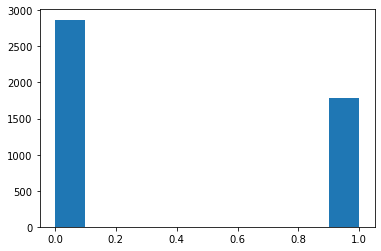

In [100]:
plt.hist(y_train_cat.ravel());

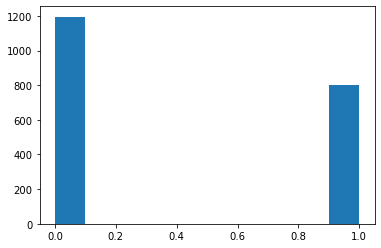

In [101]:
plt.hist(y_val_cat.ravel());

#### 1.
- Initiate the Support Vector Classifier from the sklearn library. Use RBF Kernel SVM classifier with default parameters. (No need to specify anything)
- Fit the model using the standardized data. Make sure you use the categorized target variable for classification.
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2.
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default parameters. Any change?
    

#### 3.
- Using the kernel pca transformed training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model using standardized training data (bullet 2). Is there any change in performance?
    


### Part 1

In [102]:
from sklearn.svm import SVC

In [103]:
svc = SVC(kernel ='rbf')

In [104]:
# Your code
svc.fit(X_train, y_train_cat)

SVC()

In [105]:
from sklearn import metrics
#Accuracy Train
pred_train = svc.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))

#Accuracy Test
pred_test = svc.predict(X_test)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_test_cat, y_pred = pred_test))

#Accuracy validation
pred_val = svc.predict(X_val)
print("Accuracy Scores (Valid): ",metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val), "\n")

Accuracy Scores (Train):  0.9213072457536013
Accuracy Scores (Test):  0.925575101488498
Accuracy Scores (Valid):  0.9232698094282848 



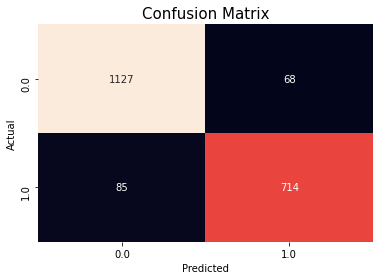

In [106]:
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val_cat), columns=pred_val.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [107]:
print(metrics.classification_report(y_true = y_val_cat, y_pred = pred_val))
met = metrics.classification_report(y_true = y_val_cat, y_pred = pred_val,  output_dict=True)
print("\nSummary of Metrics:")
print("Sensitivity %f"%(met['1.0']['recall']))
print("Specificity %f"%(met['0.0']['recall']))
print("Precision %f"%(met['1.0']['precision']))
print("Accuracy %f"%(met['accuracy']))
print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val_cat, pred_val)))
print("F1-score %f"%(met['1.0']['f1-score']))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1195
         1.0       0.91      0.89      0.90       799

    accuracy                           0.92      1994
   macro avg       0.92      0.92      0.92      1994
weighted avg       0.92      0.92      0.92      1994


Summary of Metrics:
Sensitivity 0.893617
Specificity 0.943096
Precision 0.913043
Accuracy 0.923270
Balanced Accuracy 0.918357
F1-score 0.903226


### Part 2

In [108]:
svc = SVC()
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100, 1000]
params = {'C': value,
          'gamma': value,
           'kernel': ['rbf']}

grid = GridSearchCV(estimator=svc, param_grid=params, verbose=1, cv=5, n_jobs=-1)

In [109]:
grid.fit(X_train, y_train_cat)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   51.3s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000],
                         'kernel': ['rbf']},
             verbose=1)

In [110]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

In [111]:
gs_reg = SVC(kernel='rbf', C=100, gamma=0.1)
gs_reg.fit(X_train, y_train_cat)

SVC(C=100, gamma=0.1)

In [112]:
#Accuracy Train
pred_train = gs_reg.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))
#Accuracy Validation
pred_val = gs_reg.predict(X_val)
print("Accuracy Scores (Validation): ",metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val))

Accuracy Scores (Train):  0.9318426144915072
Accuracy Scores (Validation):  0.9242728184553661


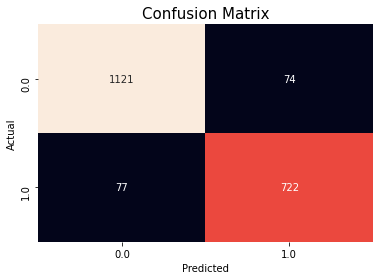

In [113]:
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val_cat), columns=pred_val.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [114]:
print(metrics.classification_report(y_true = y_val_cat, y_pred = pred_val))
met = metrics.classification_report(y_true = y_val_cat, y_pred = pred_val,  output_dict=True)
print("\nSummary of Metrics:")
print("Sensitivity %f"%(met['1.0']['recall']))
print("Specificity %f"%(met['0.0']['recall']))
print("Precision %f"%(met['1.0']['precision']))
print("Accuracy %f"%(met['accuracy']))
print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val_cat, pred_val)))
print("F1-score %f"%(met['1.0']['f1-score']))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      1195
         1.0       0.91      0.90      0.91       799

    accuracy                           0.92      1994
   macro avg       0.92      0.92      0.92      1994
weighted avg       0.92      0.92      0.92      1994


Summary of Metrics:
Sensitivity 0.903630
Specificity 0.938075
Precision 0.907035
Accuracy 0.924273
Balanced Accuracy 0.920852
F1-score 0.905329


- The best GridsearchCV model have the accuracy, precision, f1 similar to the default model, so it performs similarily than the default model.
- The best GridsearchCV model has a recall and F1 score less than 1% higher than those of default model.
- The best model is not overfitting as the accuracy rate of train and validation set are high and close to each other.

### Part 3

In [115]:
svc = SVC(kernel = "rbf")
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value,}

grid = GridSearchCV(estimator=svc, param_grid=params, verbose=1, cv=5, n_jobs=-1)

In [116]:
grid.fit(X_train_kpca, y_train_cat)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                   100]},
             verbose=1)

In [117]:
grid.best_estimator_

SVC(C=100, gamma=1)

In [118]:
gs_reg = SVC(kernel='rbf', C=100, gamma=1)
gs_reg.fit(X_train_kpca, y_train_cat)

SVC(C=100, gamma=1)

In [119]:
#Accuracy Train
pred_train = gs_reg.predict(X_train_kpca)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))
#Accuracy Validation
pred_val = gs_reg.predict(X_val_kpca)
print("Accuracy Scores (Validation): ",metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val))

Accuracy Scores (Train):  0.9400129004515158
Accuracy Scores (Validation):  0.9227683049147443


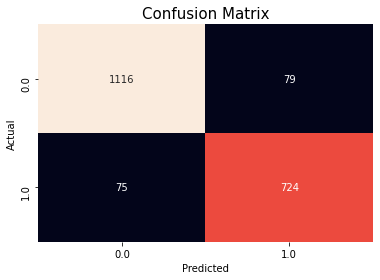

In [120]:
# Create confusion metrics
confusion_matrix =  pd.crosstab(index=np.ravel(y_val_cat), columns=pred_val.ravel(), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [121]:
print(metrics.classification_report(y_true = y_val_cat, y_pred = pred_val))
met = metrics.classification_report(y_true = y_val_cat, y_pred = pred_val,  output_dict=True)
print("\nSummary of Metrics:")
print("Sensitivity %f"%(met['1.0']['recall']))
print("Specificity %f"%(met['0.0']['recall']))
print("Precision %f"%(met['1.0']['precision']))
print("Accuracy %f"%(met['accuracy']))
print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val_cat, pred_val)))
print("F1-score %f"%(met['1.0']['f1-score']))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      1195
         1.0       0.90      0.91      0.90       799

    accuracy                           0.92      1994
   macro avg       0.92      0.92      0.92      1994
weighted avg       0.92      0.92      0.92      1994


Summary of Metrics:
Sensitivity 0.906133
Specificity 0.933891
Precision 0.901619
Accuracy 0.922768
Balanced Accuracy 0.920012
F1-score 0.903870


- The best KPCAs model in Part 3 have similiar sensitivity, accuracy, precision, f1 similar to the Part 2 model, so it performs similarily to the part-2 model.
- The KPCAs model in Part 3 is more overfitting than the Part-2 model as the gap between accuracy rate of train and validation set is 1.8% which is higher than the gap in part 2 of 0.7%.

## Q8 [10]

- Using the Support Vector Regressor (Any of them):
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using, or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - If both of them did not improve, comment on why this might have been the case. What else can be done?
    - Optional: Apply different things as you see fit and see if the validation performance is improving.

### Method 1: Remove Outliers using Interquatile Rule (IQR)

- An outlier and noise can incorrectly change the mean and standardiviation which can have the negative impact on the SVR model.
- To improve the SVR model and avoid misleading interpretations, we need to remove outliers.
- IQR method can identify outliers by computing the range between Q1 and Q3. if the data points is less than (Q1-1.5*IQR) or more than (Q3+1.5*IQR), they are considered as outliers.


In [122]:
# Compute IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AT      12.611500
AP       8.625000
AH      20.206500
AFDP     1.077525
GTEP     6.871250
TIT     29.400000
TAT      5.282500
TEY     20.905000
CDP      1.682250
CO       1.894375
NOX     12.694250
dtype: float64


In [123]:
# Remove outliers and create new dataset
new_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Clean data (No outliers)

In [124]:
# Check the statistics
new_df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000
mean,18.961726,1013.335317,68.036505,3.613334,25.965724,1080.207819,548.105844,133.371824,12.053777,2.701250,57.956808
std,7.291085,5.727596,13.816873,0.562190,3.879969,17.176065,3.189006,13.341493,0.962716,1.276189,8.126079
min,-3.303800,996.760000,29.270000,2.471700,17.972000,1037.200000,536.870000,100.470000,9.935800,0.212900,39.556000
25%,13.381750,1009.100000,58.163500,3.175300,23.388750,1072.900000,546.570000,128.610000,11.571000,1.733975,52.177750
50%,19.277500,1013.100000,70.276000,3.543950,25.299500,1080.300000,549.840000,131.555000,11.936000,2.319000,56.018000
75%,24.634750,1016.900000,79.396500,4.182075,29.734000,1099.700000,550.060000,145.957500,13.061250,3.523125,62.912000
max,36.264000,1031.200000,96.666000,4.901600,38.362000,1100.300000,550.590000,162.400000,13.807000,6.536900,84.120000


#### Resplit the new dataset

In [125]:
# Resplitted the new dataset
y_c = new_df.CO
X_c = new_df.drop(['CO', 'NOX'], axis=1)
from sklearn.model_selection import train_test_split
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_c, y_c, test_size=0.10, random_state=555)
X_train_clean, X_val_clean, y_train_clean, y_val_clean = train_test_split(X_train_clean, y_train_clean, test_size=0.30, random_state=555)

#### Standardize data

In [126]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train_clean)
X_train_clean = ss.transform(X_train_clean)
X_val_clean = ss.transform(X_val_clean)
X_test_clean = ss.transform(X_test_clean)

#### Gridsearch

In [127]:
# Perform Gridsearch
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value}

grid = GridSearchCV(estimator=reg, param_grid=params, verbose=1, cv=5,scoring="r2", n_jobs=-1)

In [128]:
grid.fit(X_train_clean, y_train_clean)
grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.2min finished


SVR(C=10, gamma=0.1)

#### Fit the RBF Kernel SVR with the best params

In [129]:
#Fit the best model
gs_reg = SVR(kernel='rbf', C=10, gamma=0.1)
gs_reg.fit(X_train_clean, y_train_clean)

SVR(C=10, gamma=0.1)

In [130]:
#Compute R2
pred_train = gs_reg.predict(X_train_clean)
pred_val = gs_reg.predict(X_val_clean)

r2_train = metrics.r2_score(y_train_clean, pred_train)
r2_val = metrics.r2_score(y_val_clean, pred_val)
print("R2 Score (Train): ", r2_train )
print("R2 Score (Validation): ",r2_val)
#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train_clean, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val_clean, pred_val))

print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Train):  0.8282792656132072
R2 Score (Validation):  0.8190355056103744
RMSE (Train):  0.5285945853505051
RMSE (Validation):  0.5533950591184246


### Summary Method 1

- The new SVR model has significantly improved from all previous SVR models that fitted with original datataset (in Q4), PCAs (in Q5), 30KPCAs (in Q6).
- Removing outliers has  significantly improved model vecuase SVR is sensitive to the noise.
- The new model has R2 score about 8% higher than the initial model for both train and validation sets
- The R2 Score (Validation) is 81.90%, compared to R2 of the previous model of 73% (Q4).
- The RMSE of the new model is 0.55 which is 50% lower than the RMSE of 1.16 of the previous model.
- Compared to all SVR previous models, the new model is not overfitting and has the least gap, its R2 scores for train is only 1% higher than that of the validation.

### Method 2: Increase size of Kernel PCA to 50

- Increasing the size of KPCA will increase the dimensional space
- It will provide us with greater power and can help in capturing the non-linear relationship.
- We will increase the KPCAs from 30 in Q6 to 50
- We will use the same dataset with method 1 (clean data with no outliers)

In [131]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=100, kernel='rbf', n_jobs=-1, remove_zero_eig=True)
kpca.fit(X_train_clean)
X_train_kpca = kpca.transform(X_train_clean)
X_val_kpca = kpca.transform(X_val_clean)

In [132]:
#Create 50 KPCAs 
X_train_kpca = X_train_kpca[:, 0:50]
X_val_kpca = X_val_kpca[:, 0:50]

In [133]:
# Perform Gridsearch
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value}

grid = GridSearchCV(estimator=reg, param_grid=params, verbose=1, cv=5,scoring="r2", n_jobs=-1)

In [134]:
grid.fit(X_train_kpca, y_train_clean)
grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.9min finished


SVR(C=100, gamma=0.1)

In [135]:
#Fit the best model
gs_reg = SVR(kernel='rbf', C=100, gamma=0.1)
gs_reg.fit(X_train_kpca, y_train_clean)

SVR(C=100, gamma=0.1)

In [136]:
# Your code
#Compute R2
pred_train = gs_reg.predict(X_train_kpca)
pred_val = gs_reg.predict(X_val_kpca)

r2_train = metrics.r2_score(y_train_clean, pred_train)
r2_val = metrics.r2_score(y_val_clean, pred_val)
print("R2 Score (Train): ", r2_train )
print("R2 Score (Validation): ",r2_val)
#Compute RMSE
rmse_train = sqrt(metrics.mean_squared_error(y_train_clean, pred_train))
rmse_val = sqrt(metrics.mean_squared_error(y_val_clean, pred_val))

print("RMSE (Train): ", rmse_train)
print("RMSE (Validation): ",rmse_val)

R2 Score (Train):  0.8219424148266208
R2 Score (Validation):  0.819929244986789
RMSE (Train):  0.5382593481849796
RMSE (Validation):  0.5520268262634312


### Summary Method 2

- The new SVR model has significantly improved from the previous SVR model that fitted with 30 KPCAs (in Q6).
- The new model has R2 score about 8% higher than the 30 KPCAs model for both train and validation sets
- The R2 Score (Validation) is 81.99%, compared to R2 of the previous model with 30 KPCAs of 74%.
- The RMSE of the new model is 0.55 which is 60% lower than the RMSE of 1.16 of the previous model.
- Compared to the previous model with 30 KPCAs, the new model is not overfitting, its R2 scores for train is only 0.2% higher than that of the validation.

## Q9 [10]

- Using the Support Vector Classifier (Any of them):
    - Think of other ways of improving the clasification performance and list at least two possibilities.
    - You can use any of the datasets we have been using, or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any classification performance metric that you deem to be appropriate.
    - If both of them did not improve, comment on why this might have been the case. What else can be done?
    - Use at least 3 more classification models to perform classification. (Logistic Reg, Random Forest, etc. You can choose anything)
        - Perform hyper-parameter tuning on at least one of them.
        - Compare the validation performances with SVC. Which one is better?
    - Optional: Apply different methods as you see fit and see if the validation performance is improving.

In [137]:
#This function will be called to print the classification report and summary of metric.
def performMetric(my_true, my_pred, printMetric):
    if (printMetric == True):
        print(metrics.classification_report(y_true = my_true, y_pred = my_pred))
    met = metrics.classification_report(y_true = my_true, y_pred = my_pred,  output_dict=True)
    print("\nSummary of Metrics:")
    print("Sensitivity %f"%(met['1.0']['recall']))
    print("Specificity %f"%(met['0.0']['recall']))
    print("Precision %f"%(met['1.0']['precision']))
    print("Accuracy %f"%(met['accuracy']))
    print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val_cat, pred_val)))
    print("F1-score %f"%(met['1.0']['f1-score']))

### Method 1: Feature Selection (ExtraTreesClassifier)

- As we try to improve SVC to predict binary y, we need to select important and relevent features that have the strongest relationship with the the target class
- Using the original dataset (standardized values)
- Recreate binary target y for the new dataset
- Use ExtraTreesClassifier to examine the important value of features
- The higher value is the more important the variable is.
- We will drop features with the low feature importances scores

In [138]:
#Use ExtraTreesClassifier to rank the important features
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train, y_train_cat)#y binary from Q7
imp = model.feature_importances_
feat_importances = pd.Series(imp, index=X.columns)
feat_importances

AT      0.148358
AP      0.046520
AH      0.034634
AFDP    0.180890
GTEP    0.099384
TIT     0.167753
TAT     0.039431
TEY     0.128247
CDP     0.154782
dtype: float64

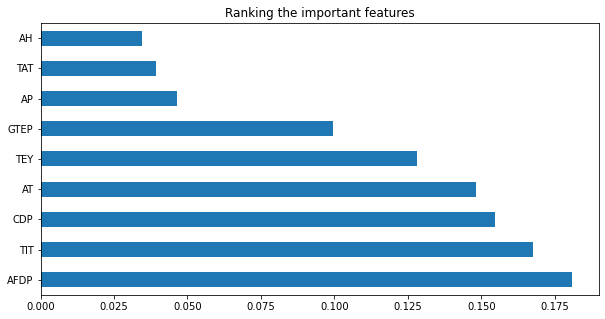

In [139]:
plt.figure(figsize=(10,5))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Ranking the important features")
plt.show()

- Now we can identify that AFDP is the most important feature that contribute to y prediction
- The least important features are AH, TAT, AP which have score < 0.035.
- We will drop these 3 features and refitted the SVC

#### Create a new dataset with 6 improtant features

In [140]:
# Using the original dataset ( standardized values)
# Drop 3 Unimprotant features and target variables
X = new_df.drop(['AH','TAT', 'AP', 'CO', 'NOX' ], axis=1)
y = new_df.CO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=555)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=555)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)


# Recreate binary target y for the new dataset
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=3)
binarizer.fit([y_train])
y_train_cat = binarizer.transform([y_train]).ravel()
y_val_cat = binarizer.transform([y_val]).ravel()
y_test_cat = binarizer.transform([y_test]).ravel()

#### GridSearch on New X with selected 6 features

In [141]:
# Perform GridSearch on New X with selected features
svc = SVC()
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value,
           'kernel': ['rbf']}

grid = GridSearchCV(estimator=svc, param_grid=params, verbose=1, cv=5, n_jobs=-1)

In [142]:
grid.fit(X_train, y_train_cat)
grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   22.8s finished


SVC(C=1, gamma=10)

#### Fit the SVC model

In [143]:
# Fit the best model
gs_reg = SVC(kernel='rbf', C=1, gamma=10)
gs_reg.fit(X_train, y_train_cat)

SVC(C=1, gamma=10)

In [144]:
#Accuracy Train
pred_train = gs_reg.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))

#Accuracy Validation
pred_val = gs_reg.predict(X_val)
print("Accuracy Scores (Validation): ",metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val), "\n")

#Print classification metrices
performMetric(y_val_cat, pred_val, True)

Accuracy Scores (Train):  0.9481290322580646
Accuracy Scores (Validation):  0.9048765803732691 

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1069
         1.0       0.87      0.87      0.87       592

    accuracy                           0.90      1661
   macro avg       0.90      0.90      0.90      1661
weighted avg       0.90      0.90      0.90      1661


Summary of Metrics:
Sensitivity 0.866554
Specificity 0.926099
Precision 0.866554
Accuracy 0.904877
Balanced Accuracy 0.896327
F1-score 0.866554


### Summary of Method 1

- The new SVC model fitted with selected features has improved from the previous model.
- The new model has  Accuracy and Specificity over 90%.
- Compared to the previous model, the new model is more overfitting, its accuracy scores for train is 3% higher than that of the validation.
- The SVC model fitted selected features perform a better job in y binary prediction as it can capture the improtant relationship by using relevant features and explain the dataset very well.

### Method 2: Compute and Specify Class Weight

- As we can see from this histogram below, the class size is not equal.
- To solve the imbalanced class, we can compute the class_weight using the sklearn.utils
- Then, we will specify different class_weights in params for gridSerach so that the higher class-weight means you want to put more emphasis on a class. We will put more weight on the class 1 relative to class 0

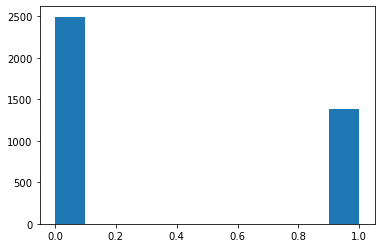

In [145]:
plt.hist(y_train_cat.ravel());

#### Compute class_weights

In [146]:
# Compute class_weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_cat),y_train_cat)
print(class_weights)

[0.77717609 1.40195369]


#### Fitted the model with selected features and class weight

In [147]:
# Fitted the model with selected features and class weight
# The best C and gamma were carried over from the method 1 above 
gs_reg = SVC(kernel='rbf', C=100, gamma=0.01, class_weight={0: 0.77, 1: 1.4})
gs_reg.fit(X_train, y_train_cat)

SVC(C=100, class_weight={0: 0.77, 1: 1.4}, gamma=0.01)

In [148]:
#Accuracy Train
pred_train = gs_reg.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))

#Accuracy Validation
pred_val = gs_reg.predict(X_val)
print("Accuracy Scores (Validation): ",metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val), "\n")

#Print classification metrices
performMetric(y_val_cat, pred_val, True)

Accuracy Scores (Train):  0.9078709677419354
Accuracy Scores (Validation):  0.8970499698976521 

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      1069
         1.0       0.83      0.89      0.86       592

    accuracy                           0.90      1661
   macro avg       0.88      0.90      0.89      1661
weighted avg       0.90      0.90      0.90      1661


Summary of Metrics:
Sensitivity 0.890203
Specificity 0.900842
Precision 0.832543
Accuracy 0.897050
Balanced Accuracy 0.895522
F1-score 0.860408


### Summary Method 2

- The new SVC model fitted with selected features and class weight has improved from the previous model that fitted with all features as the model is not overfitting and its recall is also higher.
- Compared to the previous model, the new model is not overfitting, its accuracy scores for train is only 0.001 higher than that of the validation.
- The recall has improved as we compute class weight and take care of imbalanced class.
- These implies the better prediction of class 1 of the new models with class-weight
- We put more weight on the class 1 (weight 1.4) relative to class 0 (weight 0.77).

### Compare Models with Logistic Regression, Decision Tree, Random Forest

### 1. Logistic Regression

#### Hyper-parameter tuning with C values

In [149]:
from sklearn.linear_model import LogisticRegression
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_valid = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    # Code here
    clf.fit(X_train, y_train_cat)
    pred_train = clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))
    pred_val = clf.predict(X_val)
    accuracy_valid.append(metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val))

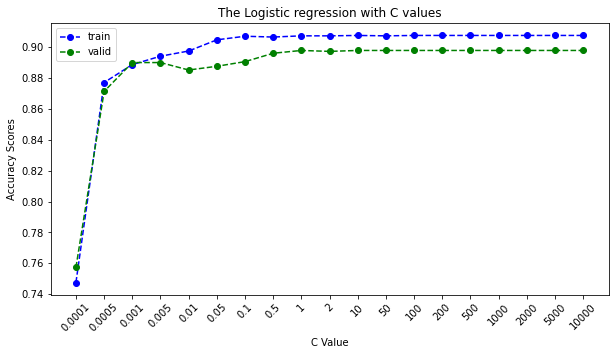

In [150]:
# Code here Plot R2 Curve
plt.figure(figsize=(10,5))
plt.title("The Logistic regression with C values")
plt.plot(accuracy_train, 'bo--', label = 'train')
plt.plot(accuracy_valid,'go--', label = 'valid')
plt.xticks(np.arange(len(C_list)), C_list, rotation = 45)
plt.xlabel('C Value')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

#### Best C value is 1

In [151]:
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=1)
clf.fit(X_train, y_train_cat)

LogisticRegression(C=1, max_iter=10000)

In [152]:
#Accuracy Train
pred_train = clf.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))

#Accuracy Validation
pred_val = clf.predict(X_val)
print("Accuracy Scores (Validation): ",metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val), "\n")

#Print summary
performMetric(y_val_cat, pred_val, False)

Accuracy Scores (Train):  0.9070967741935484
Accuracy Scores (Validation):  0.8976520168573149 


Summary of Metrics:
Sensitivity 0.864865
Specificity 0.915809
Precision 0.850498
Accuracy 0.897652
Balanced Accuracy 0.890337
F1-score 0.857621


- SVC performs slightly better than the logistic regression as the SVC's accuracy, specificity are higher.
- Both SVC and Logistic regression models have a very tiny gap (less than 1%) between accuracy score of train and validation set, so they are not overfitting.

### 2. Decision Tree

#### Hyper-parameter tuning with Max Depth values

In [153]:
MD_list = [2, 5, 10, 15, 20, 30]
accuracy_train = []
accuracy_valid = []
for md in MD_list:
    clf = DecisionTreeClassifier(max_depth=md, random_state = 42)
    clf.fit(X_train, y_train_cat)
    pred_train = clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))
    pred_val = clf.predict(X_val)
    accuracy_valid.append(metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val))


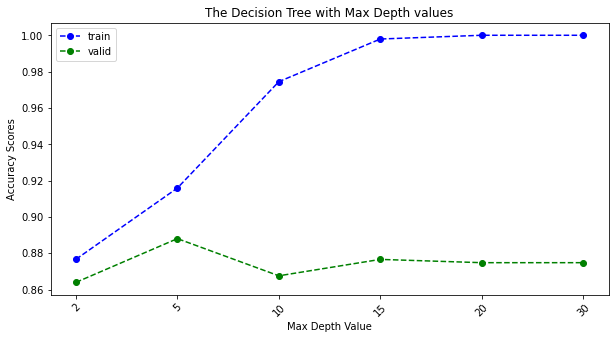

In [154]:
# Code here Plot R2 Curve
plt.figure(figsize=(10,5))
plt.title("The Decision Tree with Max Depth values")
plt.plot(accuracy_train, 'bo--', label = 'train')
plt.plot(accuracy_valid,'go--', label = 'valid')
plt.xticks(np.arange(len(MD_list)), MD_list, rotation = 45)
plt.xlabel('Max Depth Value')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

#### Best Max Depth is 5

In [155]:
clf =  DecisionTreeClassifier(max_depth=5, random_state = 42)
clf.fit(X_train, y_train_cat)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [156]:
#Accuracy Train
pred_train = clf.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))

#Accuracy Validation
pred_val = clf.predict(X_val)
print("Accuracy Scores (Validation): ",metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val), "\n")

#Print summary
performMetric(y_val_cat, pred_val, False)

Accuracy Scores (Train):  0.9158709677419354
Accuracy Scores (Validation):  0.8880192655027093 


Summary of Metrics:
Sensitivity 0.824324
Specificity 0.923293
Precision 0.856140
Accuracy 0.888019
Balanced Accuracy 0.873809
F1-score 0.839931


- SVC performs better than the Decision Tree as the SVC's accuracy, F1, specificity are higher.
- SVC have a fewer gap (less than 1%) between accuracy score of train and validation set, so they are not overfitting.
- Decision Tree has a 3% gap between accuracy score of train and validation set

### 3. Random Forest

#### Hyper-parameter tuning with Number of Estimators

In [157]:
ET_list = [10, 50, 100, 200, 300, 400]
accuracy_train = []
accuracy_valid = []
for et in ET_list:
    clf = RandomForestClassifier(n_estimators=et, random_state = 42)
    clf.fit(X_train, y_train_cat)
    pred_train = clf.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))
    pred_val = clf.predict(X_val)
    accuracy_valid.append(metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val))

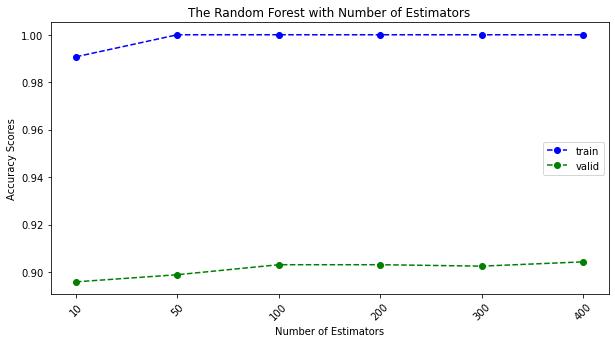

In [158]:
# Code here Plot R2 Curve
plt.figure(figsize=(10,5))
plt.title("The Random Forest with Number of Estimators")
plt.plot(accuracy_train, 'bo--', label = 'train')
plt.plot(accuracy_valid,'go--', label = 'valid')
plt.xticks(np.arange(len(ET_list)), ET_list, rotation = 45)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Scores')
plt.legend()
plt.show()

#### Best Number of Estimators is 400

#### Perform GridSearch

In [159]:
MS_list = [10, 50, 100, 200, 300]
ET_list = [400]
MD_list = [2, 5, 10, 15, 20, 30]
params = {'n_estimators': ET_list,
          'min_samples_split': MS_list,
         'max_depth': MD_list, 'random_state': [42]}

rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=params, verbose=1, cv=5, n_jobs=-1)

In [160]:
grid.fit(X_train, y_train_cat)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20, 30],
                         'min_samples_split': [10, 50, 100, 200, 300],
                         'n_estimators': [400], 'random_state': [42]},
             verbose=1)

In [161]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=400,
                       random_state=42)

In [162]:
clf= RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=400,
                       random_state=42)
clf.fit(X_train, y_train_cat)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=400,
                       random_state=42)

In [163]:
#Accuracy Train
pred_train = clf.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))

#Accuracy Validation
pred_val = clf.predict(X_val)
print("Accuracy Scores (Validation): ",metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val), "\n")

#Print summary
performMetric(y_val_cat, pred_val, False)

Accuracy Scores (Train):  0.9649032258064516
Accuracy Scores (Validation):  0.9054786273329319 


Summary of Metrics:
Sensitivity 0.864865
Specificity 0.927970
Precision 0.869270
Accuracy 0.905479
Balanced Accuracy 0.896417
F1-score 0.867062


### We will fit the SVC, Logistic Regression, decision tree and RandomForest to compare the performance of all models and write summary.

In [164]:
def compareModels(name,clf):
    clf.fit(X_train, np.ravel(y_train_cat))
    predicted = clf.predict(X_val)
    confusion_matrix =  pd.crosstab(index=np.ravel(y_val_cat), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_val_cat , predicted),3)
    plt.title(name + "  " , fontsize = 15)
    plt.show()
    print (metrics.classification_report(y_val_cat,predicted))

In [165]:
svc =SVC(kernel='rbf', C=100, gamma=0.01)
lg = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=1)#Logistic
dt = DecisionTreeClassifier(max_depth=5, random_state =42)#Decision tree
rf = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=400,random_state=42)#Random Forest

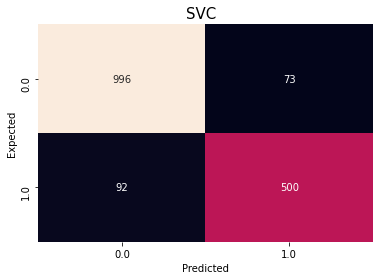

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      1069
         1.0       0.87      0.84      0.86       592

    accuracy                           0.90      1661
   macro avg       0.89      0.89      0.89      1661
weighted avg       0.90      0.90      0.90      1661



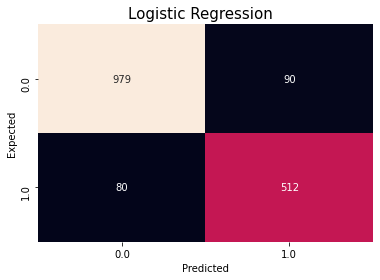

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1069
         1.0       0.85      0.86      0.86       592

    accuracy                           0.90      1661
   macro avg       0.89      0.89      0.89      1661
weighted avg       0.90      0.90      0.90      1661



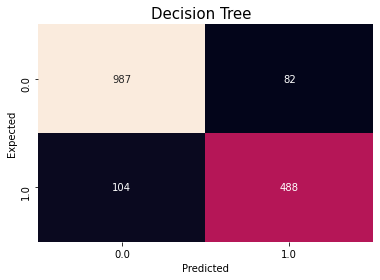

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      1069
         1.0       0.86      0.82      0.84       592

    accuracy                           0.89      1661
   macro avg       0.88      0.87      0.88      1661
weighted avg       0.89      0.89      0.89      1661



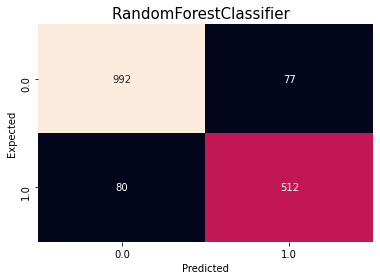

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1069
         1.0       0.87      0.86      0.87       592

    accuracy                           0.91      1661
   macro avg       0.90      0.90      0.90      1661
weighted avg       0.91      0.91      0.91      1661



In [166]:
#create an array of classifiers
names = ["SVC", "Logistic Regression", "Decision Tree", "RandomForestClassifier"]
classifiers= [svc, lg, dt,rf]

#loop through the classifiers
for name, clf in zip(names, classifiers):
    compareModels(name,clf)

### Summary of Q9: Model Comparison

- Among 4 models, the Decision Tree performs the worst with the lowest accuracy, F1, recall, specificity than other models.
- The SVC, Logistic Regression, and Random Forest performs very well and comparable to each other as the accuracy of models are 90% and F1 score are 86%.
- The SVC has the highest precision rate and specificity which indicates the model explain the class 0 and 1 well.
- Among 4 models, Random Forest clssifier has the highest F1, accuracy rate, and recall so it can predict class 1 well.
- In conclusion, SVC and Random Forest perform in general better than Logistic Regression and Decision Tree model.

## Q10 [10]

- Choose the best fitted model from each of the regressors (1 from Linear Regression, 1 from Random Forest, 1 from SVR)
- Create a table summarizing results on the **test** set:
    - Show the regression performance metric of your choice on test data for each model.
- Which model is best for regression? Is this in line with your analysis or is this not expected?
    
- Choose the best fitted model from each of the classifiers (1 from RBF Kernel SVC, 1 from each of the models you have used)
- Create a table summarizing results on the **test** set:
    - Show the classification performance metric of your choice on test data for each model. 
- Which model is best for classification? Is this in line with your analysis or is this not expected? 


- What did you learn in this project?

### 10.1 Regression Models

In [167]:
# The best model using KPCAs with 50s, 
# we need to transform the dimension of test set to the same dimension
kpca = KernelPCA(n_components=100, kernel='rbf', n_jobs=-1, remove_zero_eig=True)
kpca.fit(X_train)
X_train_kpca = kpca.transform(X_train)
X_val_kpca = kpca.transform(X_val)
X_test_kpca = kpca.transform(X_test)
X_train_kpca = X_train_kpca[:, 0:50]
X_val_kpca = X_val_kpca[:, 0:50]
X_test_kpca = X_test_kpca[:, 0:50]

In [168]:
#This function prints the test set performance for each model
def compareRegressor(modelList, x_train, y_train, x_test, y_test):
    r2_list = []
    rmse_list= []
    for m in modelList:
        m.fit(x_train, y_train)
        pred = m.predict(x_test)
        rmse_list.append(sqrt(metrics.mean_squared_error(y_test, pred)))
        r2_list.append(metrics.r2_score(y_test, pred))
    return r2_list, rmse_list

In [169]:
#Initialize models
lreg = LinearRegression()
rreg = RandomForestRegressor(max_depth=30, min_samples_split=50, n_estimators=50, random_state=42)
svr = SVR(kernel='rbf', C=100, gamma=0.1)

#create an array of models
names = [ "Linear Reg", "Random Reg", "SVR"]
classifiers= [lreg, rreg, svr]
r2_lst, rmse_lst = compareRegressor(classifiers, X_train_kpca, y_train, X_test_kpca, y_test)

#### Create tabel for test set

In [170]:
df = pd.DataFrame({ "R2": r2_lst, "RMSE": rmse_lst,}, index=names)
print("Summarize Regression Metrics for Test set")
df

Summarize Regression Metrics for Test set


,R2,RMSE
Linear Reg,0.799292,0.541677
Random Reg,0.800961,0.539420
SVR,0.800092,0.540596


### Summary of Regressors

- From the tabel above, the random regression performs the best which is slighly better than SVR as it has a higher R2 and lower RMSE.
- The linear regression slightly underperforms other models.
- The results in line with my analysis as the data has some variables have a non-linear structure, so Random Regressor and SVR would capture this structure very well. 
- Additionally, I have removed the outliers, so I expected all models to perform well after remocing outliers as SVR and linear regression are sensitive to noise.
- The final model have significantly improved from the previous models.
- All regressor models in the final stage have an accuracy rate over 79.9% and they are not overfitting.


### 10.2 Classification Model

In [171]:
#This function prints the test set performance for each model
def compareClssifier(name,clf, X_train, y_train_cat, X_test, y_test_cat ):
    clf.fit(X_train, np.ravel(y_train_cat))
    predicted = clf.predict(X_test)
    confusion_matrix =  pd.crosstab(index=np.ravel(y_test_cat), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test_cat , predicted),3)
    plt.title(name + "  " , fontsize = 15)
    plt.show()
    print (metrics.classification_report(y_test_cat,predicted))

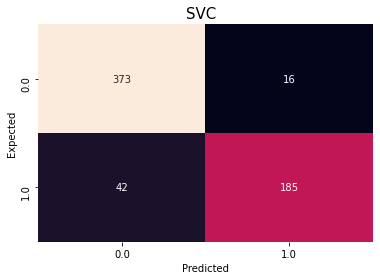

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       389
         1.0       0.92      0.81      0.86       227

    accuracy                           0.91       616
   macro avg       0.91      0.89      0.90       616
weighted avg       0.91      0.91      0.90       616



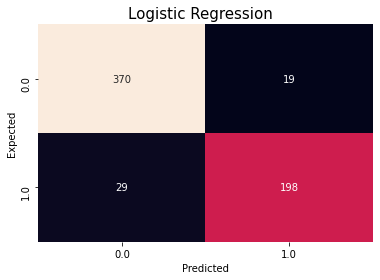

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       389
         1.0       0.91      0.87      0.89       227

    accuracy                           0.92       616
   macro avg       0.92      0.91      0.92       616
weighted avg       0.92      0.92      0.92       616



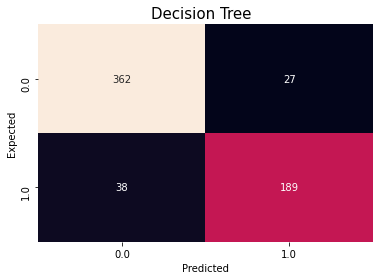

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       389
         1.0       0.88      0.83      0.85       227

    accuracy                           0.89       616
   macro avg       0.89      0.88      0.89       616
weighted avg       0.89      0.89      0.89       616



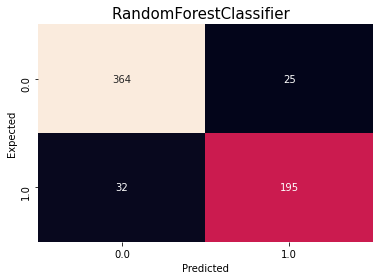

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       389
         1.0       0.89      0.86      0.87       227

    accuracy                           0.91       616
   macro avg       0.90      0.90      0.90       616
weighted avg       0.91      0.91      0.91       616



In [172]:
svc =SVC(kernel='rbf', C=100, gamma=0.01)
lg = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=1)#Logistic
dt = DecisionTreeClassifier(max_depth=5, random_state =42)#Decision tree
rf = RandomForestClassifier(n_estimators=400, random_state =42)#Random Forest

#create an array of classifiers
names = ["SVC", "Logistic Regression", "Decision Tree", "RandomForestClassifier"]
classifiers= [svc, lg, dt,rf]

#loop through the classifiers
for name, clf in zip(names, classifiers):
    compareClssifier(name,clf, X_train, y_train_cat, X_test, y_test_cat )

### Summary of Classifier Comparison

- The Logistic Regression performs the best but SVC and Random Forest are still comparable to Logistic Regression as the accuracy of models are over 91% and F1 score are over 86%.
- The Logistic Regression has higher F1 but lower specificity than SVC.
- All models can explain the class 0 and 1 well and has a high balanced accuracy rate.
- The results in line with my analysis as the data has some variables with high correlation, so logistic regression would capture this relationship very well. 
- Additionally, I have removed the outliers, so I expected both logistic regression, Random Forest, and SVC can perform well. 
- The final model have significantly improved from the previous models.
- All models in the final stage have an accuracy rate over 90% and they are not overfitting.

### 10.3 What did you learn in this project?

Overall, I learned how to develop the regression model for the numeric features. I also learned how to implement various SVM with kernel and fiited the model with different dimesions of inputs as we applied both linear PCA and Kernel PCA. I noticed that there are the improvment when we use Kernel PCAs as we can increase the model's ability to capture the non-linear relationship. There are also a trade-off between dimesion reduction using linear PCAs and we need to preserve the information. Lastly, I learned how to improve the models using various approach such as using feather selection, removing outliers, applying class weight, and increasing the size of kernel PCAs. This project is reallhy useful and give me hands-on experience to apply the concepts we have leanred in class.

# Well done!